# Karar Ağaçları (Decision Tree) ve Rastgele Orman (Random Forest) Algoritmaları

## 1. Karar Ağaçları (Decision Tree)

### Tanım
Karar ağaçları, verileri dallara ayırarak sınıflandırma veya regresyon yapabilen denetimli öğrenme algoritmalarıdır. Ağaç yapısında, her bir düğüm bir özelliğe göre veri setini böler, yaprak düğümler ise sınıf etiketlerini veya sürekli değerleri temsil eder.

### Nasıl Çalışır?
1. Veri setindeki en iyi özelliği seçerek kök düğüm oluşturulur.
2. Bu özelliğe göre veri alt gruplara ayrılır.
3. Aynı işlem her alt grupta tekrarlanır.
4. Durma kriteri sağlandığında yaprak düğümler oluşturulur.

### Avantajları
- Kolay yorumlanabilir.
- Görselleştirme kolaydır.
- Az ön işleme ihtiyaç duyar.

### Dezavantajları
- Aşırı öğrenmeye (overfitting) eğilimlidir.
- Küçük veri değişimlerine duyarlıdır.

---

## 2. Rastgele Orman (Random Forest)

### Tanım
Random Forest, birden fazla karar ağacından oluşan ve her ağacın çıktısının birleştirilerek nihai sonucun belirlendiği topluluk (ensemble) öğrenme yöntemidir. Sınıflandırma için oy çokluğu, regresyon için ortalama alınır.

### Nasıl Çalışır?
1. Veri setinden rastgele örneklerle (bootstrap) birçok alt küme oluşturulur.
2. Her alt küme için bir karar ağacı eğitilir.
3. Ağaçların tahminleri birleştirilerek son tahmin yapılır.

### Avantajları
- Aşırı öğrenmeye karşı dayanıklıdır.
- Yüksek doğruluk oranı sağlar.
- Eksik verilerle daha iyi başa çıkabilir.

### Dezavantajları
- Daha fazla hesaplama gücü gerektirir.
- Yorumlanması tek bir karar ağacına göre zordur.

---

## 3. Karşılaştırma

| Özellik              | Decision Tree          | Random Forest                |
|----------------------|------------------------|------------------------------|
| Model Yapısı         | Tek ağaç               | Birden çok ağaç (topluluk)   |
| Aşırı Öğrenme        | Yüksek risk            | Düşük risk                   |
| Hesaplama Maliyeti   | Düşük                  | Yüksek                       |
| Yorumlanabilirlik    | Yüksek                 | Düşük                        |
| Doğruluk             | Görece düşük           | Yüksek                       |

---

## 4. Kullanım Alanları
- Müşteri segmentasyonu
- Kredi risk analizi
- Tıbbi teşhis
- Pazarlama tahminleri

---

## 5. Örnek Python Kodları

### Decision Tree

```python
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Veri setini yükle
iris = load_iris()
X = iris.data
y = iris.target

# 2. Eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Karar Ağacı Modeli
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Doğruluk Oranı:", accuracy_score(y_test, dt_preds))

# 4. Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Doğruluk Oranı:", accuracy_score(y_test, rf_preds))


Decision Tree Doğruluk Oranı: 1.0
Random Forest Doğruluk Oranı: 1.0


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)  # Özellik adlarını gösterir
print(iris.target_names)   # Tür adlarını gösterir


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


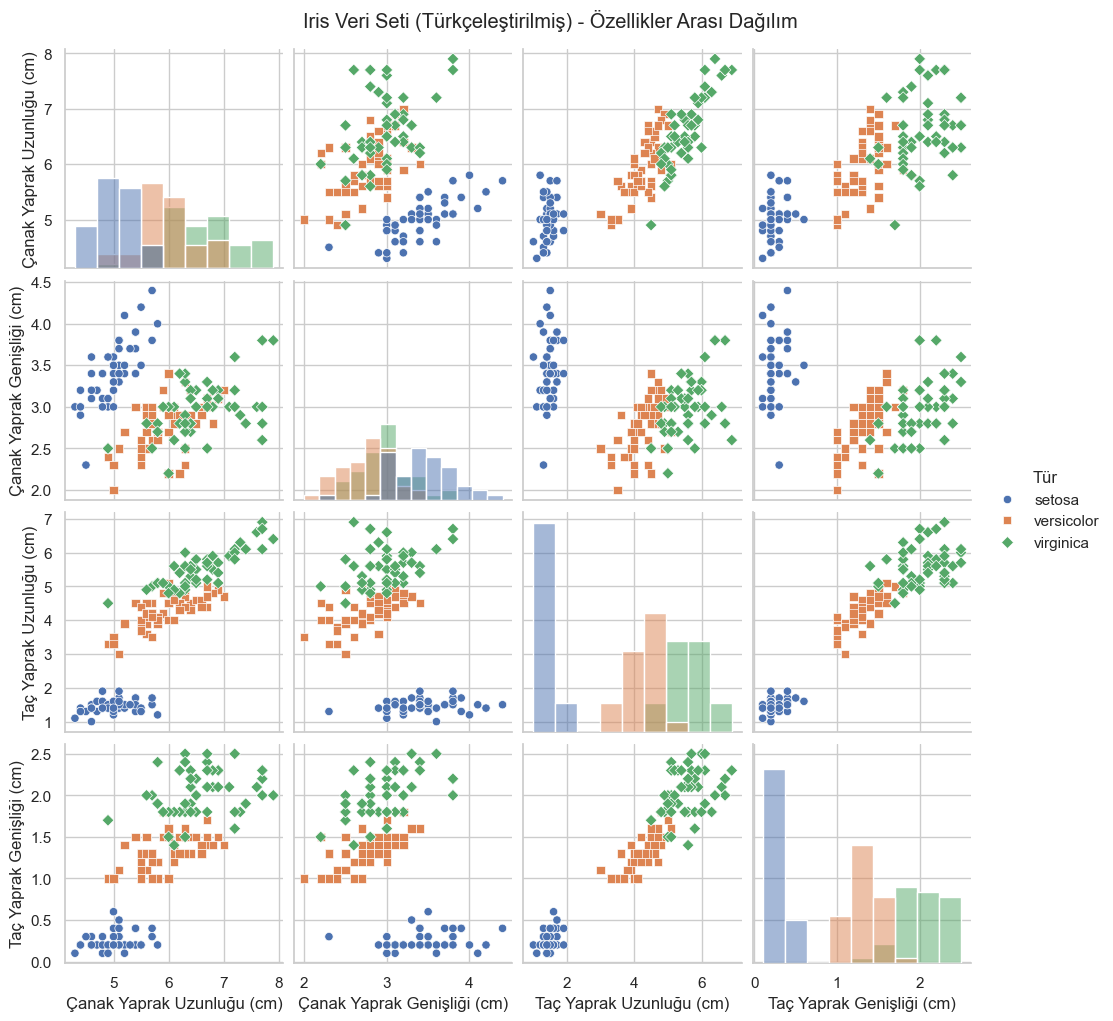

In [7]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Veri setini yükle
iris = load_iris()

# Türkçeleştirilmiş sütun adları
ozellikler = [
    "Çanak Yaprak Uzunluğu (cm)",
    "Çanak Yaprak Genişliği (cm)",
    "Taç Yaprak Uzunluğu (cm)",
    "Taç Yaprak Genişliği (cm)"
]

# DataFrame oluştur
df = pd.DataFrame(iris.data, columns=ozellikler)
df['Tür'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Görselleştirme (Histogram ile)
sns.set(style="whitegrid")
pairplot_fig = sns.pairplot(df, hue="Tür", markers=["o", "s", "D"], diag_kind="hist")
pairplot_fig.fig.suptitle("Iris Veri Seti (Türkçeleştirilmiş) - Özellikler Arası Dağılım", y=1.02)
plt.show()


In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Veriyi yükle ve modeli eğit
iris = load_iris()
X = iris.data
y = iris.target
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Kullanıcıdan çiçek ölçülerini al
print("Lütfen çiçeğin ölçülerini girin (cm):")
sepal_length = float(input("Çanak Yaprak Uzunluğu (cm): "))
sepal_width = float(input("Çanak Yaprak Genişliği (cm): "))
petal_length = float(input("Taç Yaprak Uzunluğu (cm): "))
petal_width = float(input("Taç Yaprak Genişliği (cm): "))

# Kullanıcıdan alınan ölçüleri numpy array formatında modelle tahmin et
yeni_cicek = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Türü tahmin et
tahmin = model.predict(yeni_cicek)
print("Tahmin edilen çiçek türü:", iris.target_names[tahmin[0]])


Lütfen çiçeğin ölçülerini girin (cm):


Çanak Yaprak Uzunluğu (cm):  7.1
Çanak Yaprak Genişliği (cm):  8.1
Taç Yaprak Uzunluğu (cm):  5.1
Taç Yaprak Genişliği (cm):  4.8


Tahmin edilen çiçek türü: virginica
